# Python Rocks!

- Oliver Will
- 2021-02-18
- v3

I can check the version of Python from within Jupyter Lab. I have 3.9 installed elsewhere on my compute. 

In [38]:
from platform import python_version
print(python_version())

3.8.5


I always check if the namespace is empty. This is a habit from R and I doubt I need to do it for Python.

In [1]:
# Not going to run
# dir()

Not quite sure what's in this namespace, but it doesn't look too bad.
## Three programming concepts
1. Variable assignment

In [39]:
# Example of variable assignment
x = 2
print(x)

# Note: Can assign different variable types in Python until you can't.
x = "Hello world"
print(x)

2
Hello world


2. Functions

In [40]:
# Example of function assignment
def f(x, y):
    ans = x+y
    return ans
print(f(2, 3))

5


Python has a method to delete variables and functions

In [41]:
del x
del f

# Not going to run dir
# dir()

3. Adding a package

In [42]:
import numpy as np
from IPython.display import HTML

# Simulate a dataset

It's easy to get into Markdown in Jupyter and it can handle $LaTex$.

We'll create our first data set of 100 data points. 

Simulate a regression of the form \begin{equation}y=\beta_0+\beta_1 x+\epsilon\end{equation}

where $\epsilon \sim \text{Normal}(0, \sigma=4)$.

Make it easy and let $\beta_0 = 5$ and $\beta_1 = 2$.

$x$ will be simulated from a $\text{Normal}(\mu = 0, \sigma = 4)$ and $\epsilon \sim \text{Normal}(\mu = 0, \sigma = 4)$.

In [43]:
# Use a legacy set seed
np.random.seed(4)
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html 
# for the modern way to set a seed.
x = np.random.normal(0, 4, 100)
print(x[:5])

[ 0.20224683  1.99980533 -3.98363572  2.77439403 -1.67320608]


In [44]:
# Add the response variable
y = 5+2*x+np.random.normal(0, 4, 100)
print(y[:5])

[ 8.3574821  11.60262359 -0.50830893 10.04251369  7.96908483]


In [46]:
# Make a dataframe
import pandas as pd
df = {'x':x
    ,'y':y}
df = pd.DataFrame(df)
print(df)
print(df.loc[:, 'x'])
print(df.iloc[:, 1])

           x          y
0   0.202247   8.357482
1   1.999805  11.602624
2  -3.983636  -0.508309
3   2.774394  10.042514
4  -1.673206   7.969085
..       ...        ...
95  2.092991   9.383887
96 -1.983274  -0.011796
97 -0.685858   7.135253
98 -3.777474  -4.486464
99  1.123459   3.305244

[100 rows x 2 columns]
0     0.202247
1     1.999805
2    -3.983636
3     2.774394
4    -1.673206
        ...   
95    2.092991
96   -1.983274
97   -0.685858
98   -3.777474
99    1.123459
Name: x, Length: 100, dtype: float64
0      8.357482
1     11.602624
2     -0.508309
3     10.042514
4      7.969085
        ...    
95     9.383887
96    -0.011796
97     7.135253
98    -4.486464
99     3.305244
Name: y, Length: 100, dtype: float64


## Plot the data

<AxesSubplot:xlabel='x', ylabel='y'>

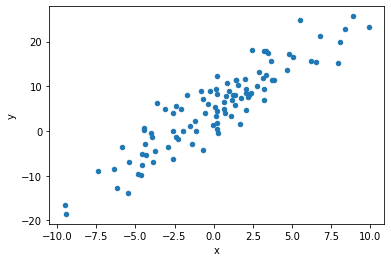

In [9]:
df.plot.scatter('x', 'y')

Maybe we need to enter the Matlibplot universe!

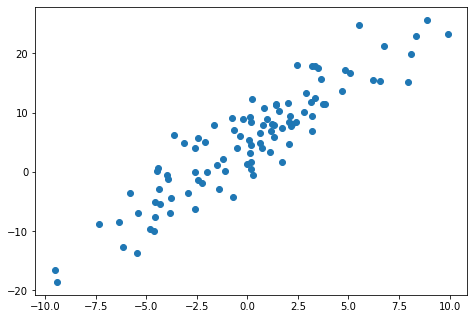

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['x'], df['y'])
plt.show()

Maybe not.

## Linear Regression
We'll fit a linear regression with OLS.

In [50]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Not happy to pull these values out into NumPy vectors
x = df.loc[:,'x'].values.reshape(-1, 1)
print("Dataframe")
print(df["x"][1:10])
print("\nNumPy")
print(x[1:10])
y = np.array(df['y']).reshape(-1, 1)

# Fit the model
regr = linear_model.LinearRegression()
regr.fit(x, y)

print("\nRegression fit")
print(regr.get_params())
print(regr.coef_)
print(regr.intercept_)

# Oh no
dir(regr)
print(regr.get_params)

Dataframe
1    1.999805
2   -3.983636
3    2.774394
4   -1.673206
5   -6.338309
6   -2.590827
7    2.394301
8    1.329000
9   -4.589907
Name: x, dtype: float64

NumPy
[[ 1.99980533]
 [-3.98363572]
 [ 2.77439403]
 [-1.67320608]
 [-6.33830894]
 [-2.59082707]
 [ 2.3943007 ]
 [ 1.32900013]
 [-4.58990653]]

Regression fit
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
[[2.13124292]]
[5.06871477]
<bound method BaseEstimator.get_params of LinearRegression()>


# Plot the line
It appears LinearRegression has produced no statistics. But plotting the best fit line is easy.

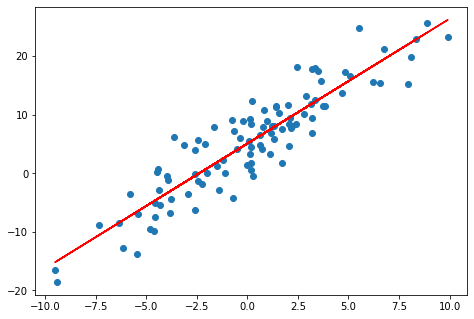

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['x'], df['y'])
ax.plot(x, regr.predict(x), color="red")
plt.show()

Let's get some statistics.

In [13]:
# Use statsmodels.api. Again have to use NumPy vectors
import statsmodels.api as sm
x = sm.add_constant(x)

print("Check the constant")
print(x[:][1:10])
fm = sm.OLS(y, x).fit()
print()
print(fm.summary())

Check the constant
[[ 1.          1.99980533]
 [ 1.         -3.98363572]
 [ 1.          2.77439403]
 [ 1.         -1.67320608]
 [ 1.         -6.33830894]
 [ 1.         -2.59082707]
 [ 1.          2.3943007 ]
 [ 1.          1.32900013]
 [ 1.         -4.58990653]]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     492.0
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           5.51e-40
Time:                        16:45:37   Log-Likelihood:                -272.77
No. Observations:                 100   AIC:                             549.5
Df Residuals:                      98   BIC:                             554.7
Df Model:                           1                                         
Covariance Type:         

One more time with a dataframe.

In [51]:
from statsmodels.formula.api import ols
fm = ols("y ~ x", data=df).fit()
fm_summary = fm.summary()

# Spruce it up
HTML(fm_summary.as_html())

# Regression exploration
We want to explore the regression line. 
- Means are on the regression line
- The slope is $r \times \sigma_y/\sigma_x$
- Solve for intercept

In [52]:
# Summary statistics
m_x = df["x"].mean()
m_y = df["y"].mean()

# Python is 0 indexed
b0 = fm.params[0]
b1 = fm.params[1]
print("Are the means on the line?")
print(m_y == b0+b1*m_x)

Are the means on the line?
False


In [16]:
print(m_y) 
print(b0+b1*m_x)

5.369421026342608
5.369421026342607


In [17]:
#println("\nIs the formula for the slope correct?")
print(b1)
r = df.corr().iloc[0,1]
print(r*df["y"].std()/df["x"].std())
print("\nWhat about the intercept?")
print(b0)
print(m_y-b1*m_x)

2.1312429238371906
2.1312429238371893

What about the intercept?
5.068714772521574
5.068714772521575


None of the values are equal!

# Check the model assumptions
1. Linear and additive
2. Errors are independent
3. Errors are normal
4. Errors are equal variance

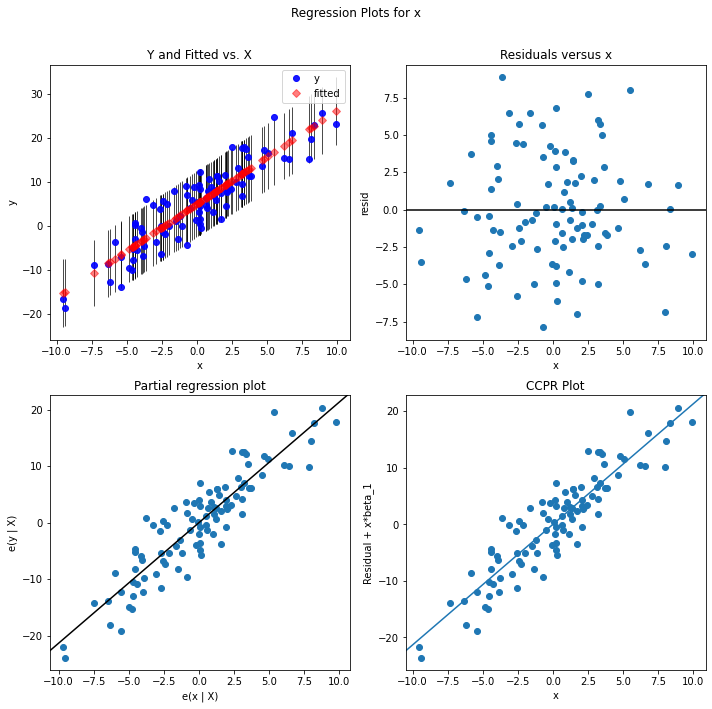

In [18]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(fm, "x", fig=fig)

I presented these because they're standard output. 
- "Y and fitted vs X" shows the scatter with the predicted values along with 95% confidence intervals. Looking good for normality.
- "Residuals vs X" shows that the variance is equal and independent along x.
- "Partial regression plot" shows predict y accounting for other variables. Should be the same as "Y and fitted vs X".
- "CCPR Plot" (Component and Component Plus Residual) Not quite sure.

# Final question: Did the 3 programming languages produce simulate data from the same distribution?

I find the scatter plots weird. Are these really the same distributions?

In [19]:
df.to_csv("python_simulation.csv")

In [20]:
df_R =pd.read_csv("r_simulation.csv")

# Assumption violations?
We have a new data set. Found here. (If I understood GitHub better, I'd download directly from there. 

https://github.com/mattharrison/xkcd-Curve-Fitting-Data-2048

In [22]:
df_xkcd =pd.read_csv("xkcd_2048_mattharrison.csv")
print(df_xkcd)

      x    y
0    67  113
1    62   80
2    49   45
3    63   55
4    71   48
5    76   59
6    73   64
7    80   65
8    93   73
9    96   94
10  101   64
11  106   59
12  102   54
13  106   52
14  116   45
15  129   47
16  166   32
17  134   73
18  141   94
19  149   82
20  151   91
21  148   98
22  169   82
23  169  105
24  163  114
25  158  132
26  148  152
27  178  114
28  171  117
29  172  123
30  175  132


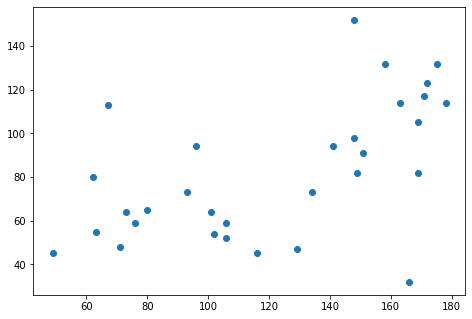

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_xkcd['x'], df_xkcd['y'])
plt.show()

<source scr="curve_fitting.png">

Let's compare

<img src="linear.jpg">

In [27]:
fm_xkcd = ols("y ~ x", data=df_xkcd).fit()
fm_xkcd_summary = fm_xkcd.summary()
print(fm_xkcd_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     13.36
Date:                Thu, 18 Feb 2021   Prob (F-statistic):            0.00101
Time:                        17:12:30   Log-Likelihood:                -144.23
No. Observations:                  31   AIC:                             292.5
Df Residuals:                      29   BIC:                             295.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6573     14.952      2.050      0.0

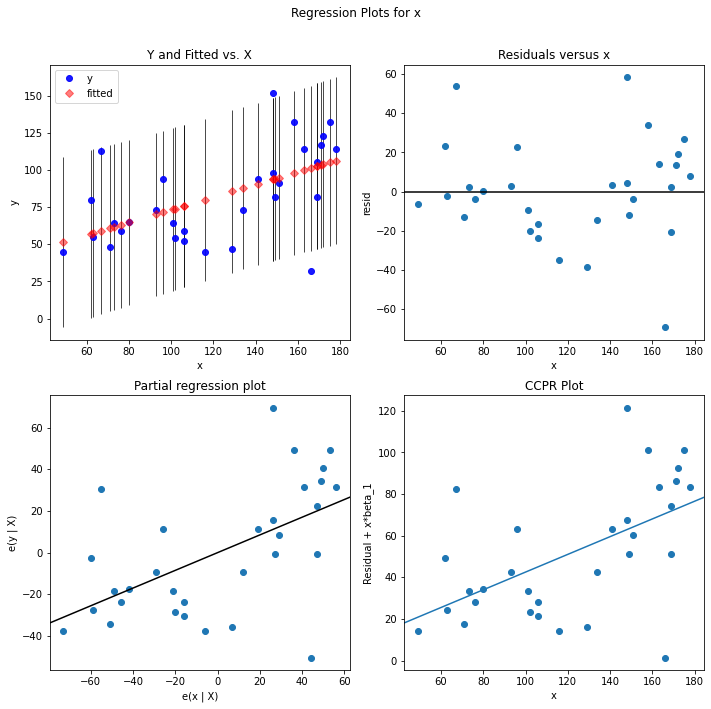

In [28]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(fm_xkcd, "x", fig=fig)

# One more thing. . .
I want to know what the CCPR Plot is

In [31]:
df_2 =pd.read_csv("example_2.csv")
print(df_2)

          x1   x2            y
0   0.867019   67   180.563550
1  -2.169970   62   -54.338553
2   3.564579   49   230.367607
3   2.383922   63   214.531864
4   6.542472   71   530.779987
5   2.757102   76   272.149245
6  -5.124987   73  -309.150841
7  -0.852578   80     3.194248
8   7.586159   93   794.291121
9   7.107453   96   788.618301
10  2.266418  101   304.151606
11  0.062878  106    73.769063
12  1.532229  102   221.812736
13 -0.180548  106    38.722081
14  0.137408  116    65.758009
15  0.676107  129   142.264639
16  4.660107  166   816.707197
17 -0.176816  134    51.536236
18 -0.401474  141    48.449293
19 -1.133778  149   -87.064313
20  6.163260  151  1038.445826
21  0.660676  148   198.102352
22  5.230489  169   988.908735
23  5.153028  169   989.818151
24  2.371588  163   514.205062
25 -1.131775  158   -40.132646
26  5.023536  148   906.765389
27  3.639357  178   775.480931
28 -3.712112  171  -522.573123
29  4.960723  172   981.636892
30  0.613857  175   249.964715


In [33]:
fm_2 = ols("y ~ x1+x2", data=df_2).fit()
fm_2_summary = fm_2.summary()
print(fm_2_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.42e-14
Time:                        17:25:09   Log-Likelihood:                -195.34
No. Observations:                  31   AIC:                             396.7
Df Residuals:                      28   BIC:                             401.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -192.7768     79.534     -2.424      0.0

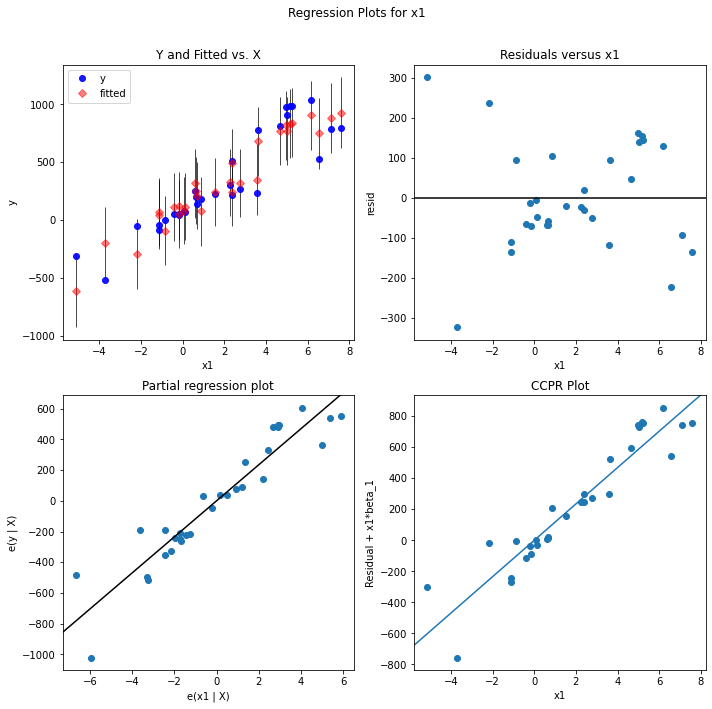

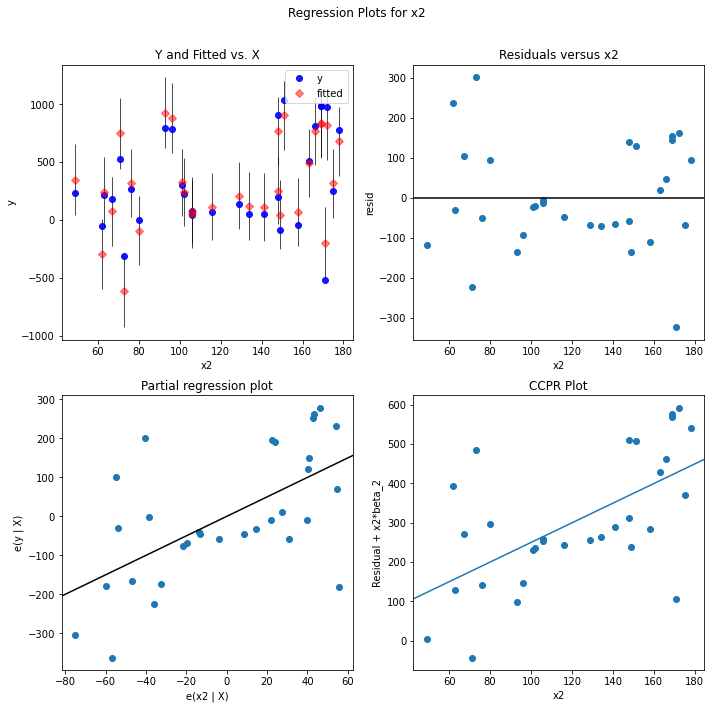

In [36]:
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(fm_2, "x1", fig=fig)
fig = plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(fm_2, "x2", fig=fig)

In [37]:
fm_2 = ols("y ~ x1+x2+x1*x2", data=df_2).fit()
fm_2_summary = fm_2.summary()
print(fm_2_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2367.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           8.65e-33
Time:                        17:28:55   Log-Likelihood:                -144.21
No. Observations:                  31   AIC:                             296.4
Df Residuals:                      27   BIC:                             302.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3574     17.801      2.042      0.0